In [1]:
#Import bitnih biblioteka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from scipy.stats import mode



In [15]:
#Učitavanje file-a
dataset=pd.read_csv('ML_Podaci_Ponovo_Adi Ćefo2.csv',encoding='utf-8-sig')
print( dataset.tail() )

     P-175  P-176  P-177  Outcome
221    8.0    8.0    7.0        0
222    7.0    6.0    6.0        0
223    7.0    8.0    7.0        1
224    7.0    7.0    6.0        0
225    NaN    NaN    NaN        0


In [16]:
#Pročišćavanje podataka(UKOLIKO SE KORISTI FILE2 OVA LINIJA JE BESPOTREBNA)
colums_to_kepp=['P-175','P-176','P-177','Outcome']
dataset=dataset[colums_to_kepp]
print( dataset.head() )



   P-175  P-176  P-177  Outcome
0    7.0    6.0    NaN        0
1    7.0    NaN    NaN        0
2    6.0    7.0    6.0        1
3   10.0    7.0    8.0        0
4    6.0    8.0    6.0        1


In [27]:
#Popunjava Outcome kolonu sa random vrijednostima 0 i 1(VISAK AKO RADIMO SA FILE 2)
#dataset['Outcome']=np.random.randint(0,2,len(dataset))
#Mjenja sve NaN vrijednosti sa 0
dataset=dataset.fillna(0)
print( dataset.tail())

     P-175  P-176  P-177  Outcome
221    8.0    8.0    7.0        0
222    7.0    6.0    6.0        0
223    7.0    8.0    7.0        1
224    7.0    7.0    6.0        0
225    0.0    0.0    0.0        0


In [18]:
#Postavljanje vrijednosti nezavisni i target varijabli
columns=['P-175','P-176','P-177']
X=dataset[columns]
y=dataset['Outcome']

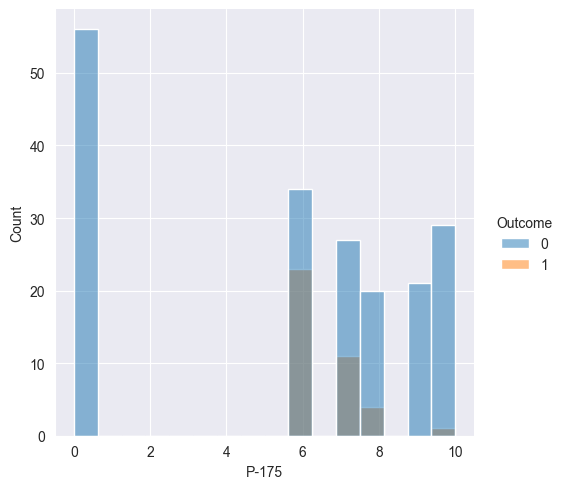

In [19]:
sns.displot(dataset,x='P-175',hue='Outcome')

In [20]:
#Generalna funkcija za računanje Euklidove distance
def euclidian_distance(pt1,pt2):
    return np.sqrt(np.sum((np.array(pt1)-np.array(pt2))**2))

point1=(1,1,1)
point2=(2,2,0)
print(euclidian_distance(point1,point2))

1.7320508075688772


In [21]:
#Glavna funkcija za računanje algoritma
def KNNAlgorithm(X_train, X_test, y_train, y_test,k_value):
    #Lista u kojem će stajati predikcije
    predictions=[]
    #iteracija kroz testne podatke
    for test_pt in X_test.to_numpy():
        #Lista u kojem će biti smještene distance
        distances=[]
        #iteracija kroz trening podatke
        for i in range(len(X_train)): #računa euklidovu distancu između training i test data point
            distances.append(euclidian_distance(np.array(X_train.iloc[i]),test_pt))
        
        #Pripremanje distanci
        distance_data=pd.DataFrame(data=distances,columns=['distance'],index=y_train.index)
        
        #Sortira distance i uzima k najbližih distanci
        k_neighbors=distance_data.sort_values(by=['distance'],axis=0)[:k_value]
        
        #Gleda u y vrijednosti od k najbližih distanci
        labels=y_train.loc[k_neighbors.index]
        
        #Računa se modus za vrijednost labela
        voting=mode(labels).mode
        #Stavljamo izabranu vrijednost u predikcije
        predictions.append(voting)       
    return predictions
        
        
    

In [22]:
#Podjela podataka na trening i testne podatke
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)


In [37]:
#Testiramo algoritam,a za vrijednost k uzimamo korijen iz broja zapisa u dataset-u
print(np.sqrt(len(X)))
predictions_test=KNNAlgorithm(X_train,X_test,y_train,y_test,15)
#Prikaz accuracy_scora
print(accuracy_score(y_test,predictions_test))

15.033296378372908
0.9347826086956522


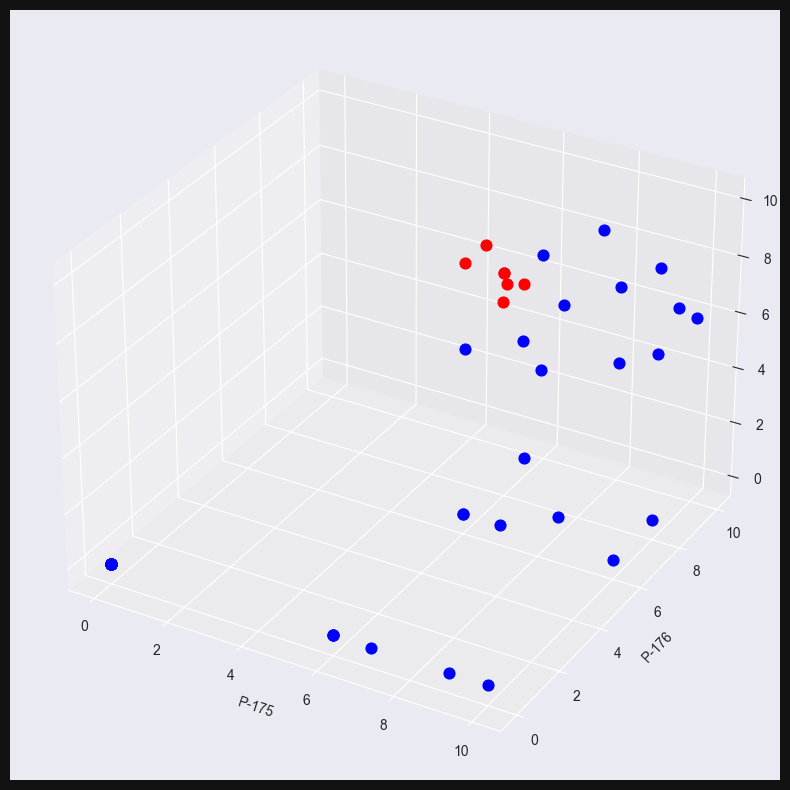

In [40]:
#Vizualizacija podataka
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(projection='3d')
ax.grid(True,color='gray')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x',color='white')
ax.tick_params(axis='y',color='white')

#Prolazimo kroz predikcije i postavljamo plavu i crvenu klasu
for i in range(len(predictions_test)):
    if predictions_test[i]==0:
        ax.scatter(X_test.iloc[i]['P-175'],X_test.iloc[i]['P-176'],X_test.iloc[i]['P-177'],color='blue',s=60)
    if predictions_test[i]==1:
        ax.scatter(X_test.iloc[i]['P-175'],X_test.iloc[i]['P-176'],X_test.iloc[i]['P-177'],color='red',s=60)
        
plt.xlabel('P-175')
plt.ylabel('P-176')
plt.show()